<h1> Importing Pandas, MatLib, and Data Sheets </h1>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
parks_pandas = pd.read_csv("parks.csv", index_col="id")
greenspaces_pandas = pd.read_csv("green_spaces.csv")
playgrounds_pandas = pd.read_csv("playgrounds.csv", index_col="id")

FileNotFoundError: [Errno 2] No such file or directory: 'parks.csv'

<h1>Introduction</h1>

Hi and welcome to the Adrenaline Junkies notebook! For our final project we decided to measure the "best" neighborhood in Pittsburgh by calculating which one is the most "fun"! We calculated this through 3 different data sets: the number of parks and rinks within each neighborhood, the number of playgrounds, and the number of green spaces. We figured this would be a good metric as opposed to anything else because it'd be relatively easy to find a clear and concise winner. A couple alternatives we considered were safety, eco-friendliness, and COVID measures.

<h1>The Metric</h1>

The metric we chose to find the best neighborhood in Pittsburgh was its "fun" value. We measured this through the amount and variety of activites that could be done in any given area. As stated before, our 3 datasets were the number of parks and rinks, the number of playgrounds, and the number of green spaces within the neighborhood. We chose these 3 datasets because they best represent a wide age and activity range.

<h1>Green Spaces Data

Analyzed by Brooklyn

I looked at the **Green Spaces** dataset from the WPRDC in order to figure out the Pittsburgh neighborhood with the greatest amount of green spaces. I feel that green spaces are a great are for people to go on nature walks, read a book under a tree, play sports, or have gatherings with their friends. Therefore the neighborhood with the most amount of green spaces would be the most fun.

<h4>Establishing Data

I imported the dataset above, so here I am just printing out the first five rows of the dataset. This is so I can clearly see all of the different names of the labels and determines which one I need later on.

In [3]:
# printing out the head of the dataset
gs = pd.read_csv("green_spaces.csv")
gs.head()

,Responsibility_Parks or Operations,Facility,Division,Total Acreage,Maintainable Acreage,Shelter,Rec Center,Senior Center,Pool,Spray Pool,...,Grandstand,Control Link for Basketball Courts,Control Link for Tennis Court,Control Linkl for Hockey Court,Dek Hockey Court,Dog Park,Spray Park,Ownership of Facility,Benches,Tables
0,Operations,Bates St Triangle,3.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
1,Operations,Baum Negley Triangle,2.0,0.2,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
2,Operations,Bedford Strip,3.0,0.3,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0
3,Operations,Beechview Monument,5.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,2.0,NaN
4,Operations,Brookline Monument,4.0,0.1,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,No,No,No,NaN,NaN,NaN,NaN,0.0,0.0


<h4>Cleaning up the data

I filtered the data table to clear out the columns that weren't needed anymore, which left me with the facility name and the neighborhood the green spaces were in.

In [8]:
# filter out all unnecessary columns
gs_filter = gs[["Facility","Neighborhood"]]
# print the head of the data
gs_filter.head()

,Facility,Neighborhood
0,Bates St Triangle,South Oakland
1,Baum Negley Triangle,East Liberty
2,Bedford Strip,Crawford Roberts
3,Beechview Monument,Beechview
4,Brookline Monument,Brookline


<h4>Finding the Most Green Spaces

In this block of code, I found the number of green spaces in each neighborhood and displayed them in a chart to visualize the neighborhood with the greatest to the least.

In [7]:
# add up all of the values for each time a park appears in a neighborhood
gs_list = gs_filter["Neighborhood"].value_counts().to_frame()
# rename the column to be "Spaces"
gs_list.rename(columns = {"Neighborhood":"Spaces"})

,Spaces
East Liberty,6
Point Breeze,5
Central Business District,4
Central Oakland,3
South Oakland,2
Point Breeze North,2
Squirrel Hill South,2
Swisshelm Park,2
Crawford Roberts,1
Beechview,1


<h4>Filtering the Data Again

I decided to remove the neighborhoods that show only one green space because those are less likely to be the top choices.

In [28]:
# remove neighborhood is number is equal to 1
greenspaces = gs_list[gs_list["Neighborhood"] > 1]
print(greenspaces)

                           Neighborhood
East Liberty                          6
Point Breeze                          5
Central Business District             4
Central Oakland                       3
South Oakland                         2
Point Breeze North                    2
Squirrel Hill South                   2
Swisshelm Park                        2


<h4>Plotting the Data

I created a bar chart in order to show the neighborhoods side by side more clearly.

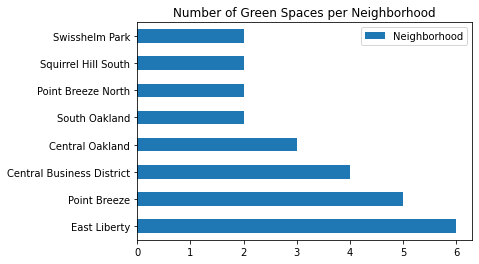

In [40]:
# created a bar chart and turned it horizontally
greenspaces.plot.barh(title="Number of Green Spaces per Neighborhood")

<h4>Results and Conclusion

In the bar chart and all of the tables, it was clear that **East Liberty** is the best neighborhood in terms of the amount of green spaces that it has to offer. However, in order to be able to check with the other metrics, number of courts, rinks, and parks, I have ranked the top neighborhoods with at least two green spaces.

1. East Liberty
2. Point Breeze
3. Central Business District
4. Central Oakland
5. South Oakland
6. Point Breeze North
7. Squirrel Hill South
8. Swisshelm Park

![pittsburgh](https://media.giphy.com/media/EBZZxeGUKuO4dfDJyw/giphy.gif)

<h1> Playgrounds Analysis

Analyzed by Karlynn

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

![](https://media.giphy.com/media/btvfdqk1SU2TC/giphy.gif)

In [3]:
playgrounds = pd.read_csv("playgrounds.csv")
playgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


This is where I imported the software and entered my dataset.

In [4]:
playgrounds2 = playgrounds[["name", "neighborhood"]]
playgrounds2.head()

,name,neighborhood
0,Able Long Playground,Beechview
1,Albert Graham Playground,Crawford-Roberts
2,Alpine Playground,Central Northside
3,Alton Playground,Beechview
4,Ammon Playground,Bedford Dwellings


This is where I trimmed down the amount of columns in the dataset and left only the ones important to me.

In [5]:
pg_list = playgrounds2["neighborhood"].value_counts().to_frame()
pg_list.rename(columns = {"neighborhood":"playgrounds"})

,playgrounds
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Highland Park,4
Sheraden,4
...,...
Esplen,1
Fairywood,1
Regent Square,1
Allentown,1


Here, I found the number of playgrounds in each neighborhood, which is what I was looking for in order to apply it to deciding on a best neighborhood.

In [6]:
df = pg_list[pg_list['neighborhood'] > 3]
df

,neighborhood
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Highland Park,4
Sheraden,4
Beltzhoover,4
Allegheny Center,4


This is where I ranked the neighborhoods with more than 3 playgrounds from most playgrounds to least.

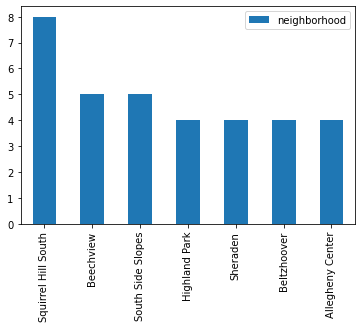

In [7]:
df.plot.bar()

Here, I used a bar graph to more clearly visualize which neighborhoods had the most playgrounds.

## Results

I was looking for the neighborhood with the most playgrounds. After searching through the data, the neighborhood with the most is Squirrel Hill South. In case this isn't the winner for the other two datasets, here are my top 7 neighborhoods in order from most playgrounds to least.

<ol>
    <li>Squirrel Hill South</li>
    <li>Beechview</li>
    <li>South Slide Slopes</li>
    <li>Highland Park</li>
    <li>Sheraden</li>
    <li>Beltzhoover</li>
    <li>Allegheny Center</li>
</ol>

Pictured above is Bartlett Playground in Squirrel Hill South!

<h1>The Best Neighborhood </h1>

The best neighborhood for kids to have fun outside in is **Squirrel Hill South**.

Even though Squirrel Hill South came in seventh in Green Spaces, the first six neighborhoods did not make it in the top of the other two analyses. Plus, Squirrel Hill South came in first for Number of Parks and Rinks, and Playgrounds.

<h1> Conclusion </h1>

**Brooklyn-**

I would honestly have to say that Squirrel Hill South is my favorite neighborhood to visit because of Schenley Park and Frick Park. I have gone hiking there, and I have found it to be quite enjoyable. I find that squirrel Hill South would be a great place to go for anyone who is seeking an adrenaline rush whether that be parks and rinks, playgrounds, or green spaces.

**Hleb-**

My favorite neighborhood is also Squirrel Hill South. Schenley Park is beautiful and is definitely one of my favorite places in all of Pittsburgh. The neighborhood also has the largest amount and variety of courts, rinks, and playgrounds.

**Karlynn-**

I'm not too familiar with the neighborhoods of Pittsburgh, so if I had to pick my favorite neighborhood, it would be Central Oakland. Based on our metric of choosing the best neighborhood to have fun outside in, I think Central Oakland could still work. This is mainly because of Schenley Park, however I think some of the park bleeds into Squirrel Hill South, which is our winning "best neighborhood."